In [19]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')
pd.options.mode.chained_assignment = None

Let's start by importing the dataset

In [2]:
dataset = pd.read_csv("Datasets/LeagueOfLegends/PIGStatistic.csv")

print(dataset.head()) 

  Team    Player Opponent Position Champion  Kills  Deaths  Assists  \
0  UOL      Boss       GS      Top  Camille      4       5        3   
1   GS     Crazy      UOL      Top     Gwen      3       1        9   
2  UOL  Ahahacik       GS   Jungle  Trundle      2       4        5   
3   GS    Mojito      UOL   Jungle    Talon      5       4       10   
4  UOL    Nomanz       GS      Mid  Leblanc      1       3        4   

   Creep Score  Gold Earned  Champion Damage Share  Kill Participation  \
0          188        11107                   0.17                0.78   
1          217        12201                   0.20                0.52   
2          156         9048                   0.15                0.78   
3          194        11234                   0.23                0.65   
4          216         9245                   0.29                0.56   

   Wards Placed  Wards Destroyed  Ward Interactions  Dragons For  \
0             8                8                 16         

Let's divide the feature in categorical and numeric

In [3]:
categorical_features  = list(dataset.select_dtypes(np.object).columns)
numeric_features = list(dataset.select_dtypes(np.number).columns)
rank_features = numeric_features[-4:]

numeric_features = numeric_features[:-4] 
print("Categorical features {}".format(categorical_features))
print("Numeric features {}".format(numeric_features))
print("Rank features {}".format(rank_features))


Categorical features ['Team', 'Player', 'Opponent', 'Position', 'Champion', 'Result']
Numeric features ['Kills', 'Deaths', 'Assists', 'Creep Score', 'Gold Earned', 'Champion Damage Share', 'Kill Participation', 'Wards Placed', 'Wards Destroyed', 'Ward Interactions']
Rank features ['Dragons For', 'Dragons Against', 'Barons For', 'Barons Against']


In [4]:
print(dataset.describe())
print()
print(dataset.count())

            Kills      Deaths     Assists  Creep Score   Gold Earned  \
count  220.000000  220.000000  220.000000   220.000000    220.000000   
mean     2.709091    2.718182    5.668182   200.340909  11008.159091   
std      2.579673    1.747179    3.888149   101.328153   3198.806207   
min      0.000000    0.000000    0.000000    14.000000   4714.000000   
25%      1.000000    1.000000    3.000000   156.000000   8691.250000   
50%      2.000000    3.000000    5.000000   210.000000  10454.500000   
75%      4.000000    4.000000    8.000000   266.250000  13431.750000   
max     13.000000    7.000000   19.000000   419.000000  20546.000000   

       Champion Damage Share  Kill Participation  Wards Placed  \
count             220.000000          220.000000    220.000000   
mean                0.200000            0.608273     19.454545   
std                 0.095051            0.190404     15.713553   
min                 0.040000            0.000000      3.000000   
25%                 0

Check the histogram of the numeric feature

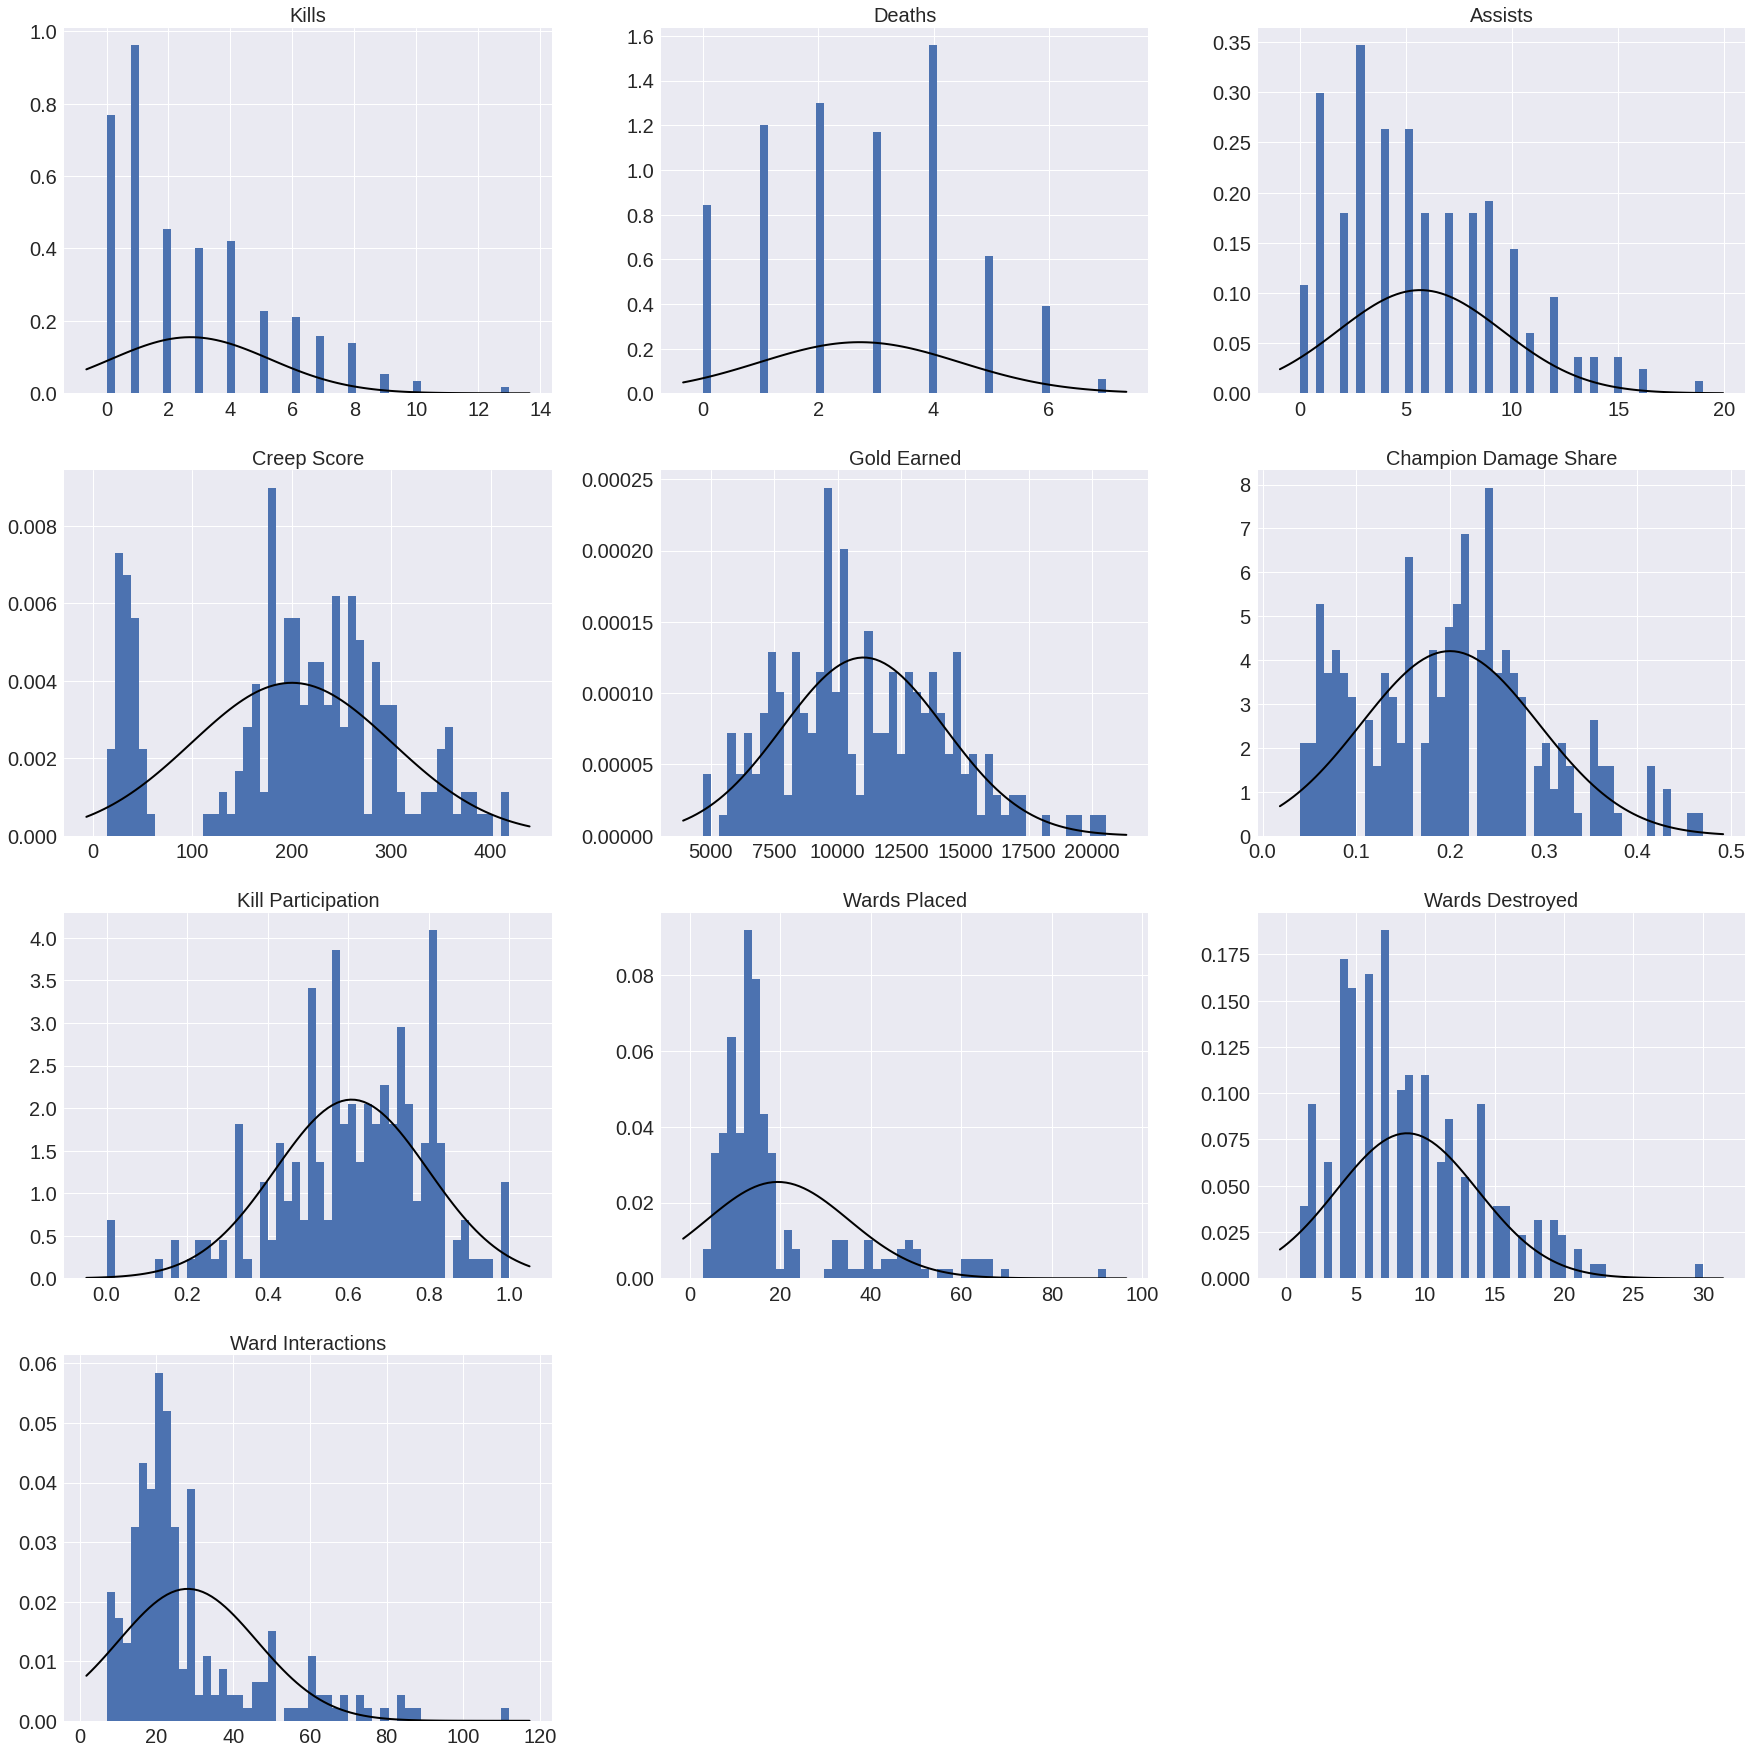

In [5]:
from scipy.stats import norm

fig,axes = plt.subplots(nrows= int(np.ceil(len(numeric_features)/3)), ncols= 3,figsize=(25,25 ))

plt.rcParamsDefault["figure.figsize"] = (30,12)
plt.rcParamsDefault["font.size"] = 25
axes = axes.flatten()
axes_to_remove = axes[- (len(axes)-len(numeric_features)):]
axes[ :- (len(axes)-len(numeric_features))]

for x in axes_to_remove:
    fig.delaxes(x)

for clm,ax in zip(numeric_features,axes):
    ax.hist(dataset[clm],bins=50,density=1)
    
    mu,std = norm.fit(dataset[clm])

    x_min,x_max = ax.get_xlim()
    y_min,y_max = ax.get_ylim()
    x = np.linspace(x_min,x_max,100)
    p = norm.pdf(x,mu,std)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.plot(x,p,'k',linewidth=2)
    ax.set_title(clm,fontsize=20)
    
fig.tight_layout(pad=3.0)

The kills one and the Assist seem to be distribuited as a geometrical distribution, and it align with the intuition that having a lot of kills is very hard in league of legends, and same with the death, because they are pro player or it hard that they will die, so its less and less probable the more the kill and deaths a player has 

Lets divide the dataset in the different set of role in league of legends and plot some data with that

In [6]:
roles=  dataset['Position'].unique()

dataset_roles = dict()
for role in roles:
    df = dataset[dataset['Position'] == role]
    dataset_roles[role] = df
    

Let's graph for each role the different graph and their value

Role Top :
	Kills Mean: 3.66
	Kills Max: 13
	Kills Min: 0


	Deaths Mean: 2.82
	Deaths Max: 6
	Deaths Min: 0


	Assists Mean: 4.41
	Assists Max: 14
	Assists Min: 0


	Creep Score Mean: 238.05
	Creep Score Max: 395
	Creep Score Min: 151


	Gold Earned Mean: 12248.98
	Gold Earned Max: 19128
	Gold Earned Min: 6984


	Champion Damage Share Mean: 0.24
	Champion Damage Share Max: 0.46
	Champion Damage Share Min: 0.12


	Kill Participation Mean: 0.57
	Kill Participation Max: 1.0
	Kill Participation Min: 0.0


	Wards Placed Mean: 12.25
	Wards Placed Max: 19
	Wards Placed Min: 5


	Wards Destroyed Mean: 6.20
	Wards Destroyed Max: 14
	Wards Destroyed Min: 1


	Ward Interactions Mean: 18.45
	Ward Interactions Max: 30
	Ward Interactions Min: 9




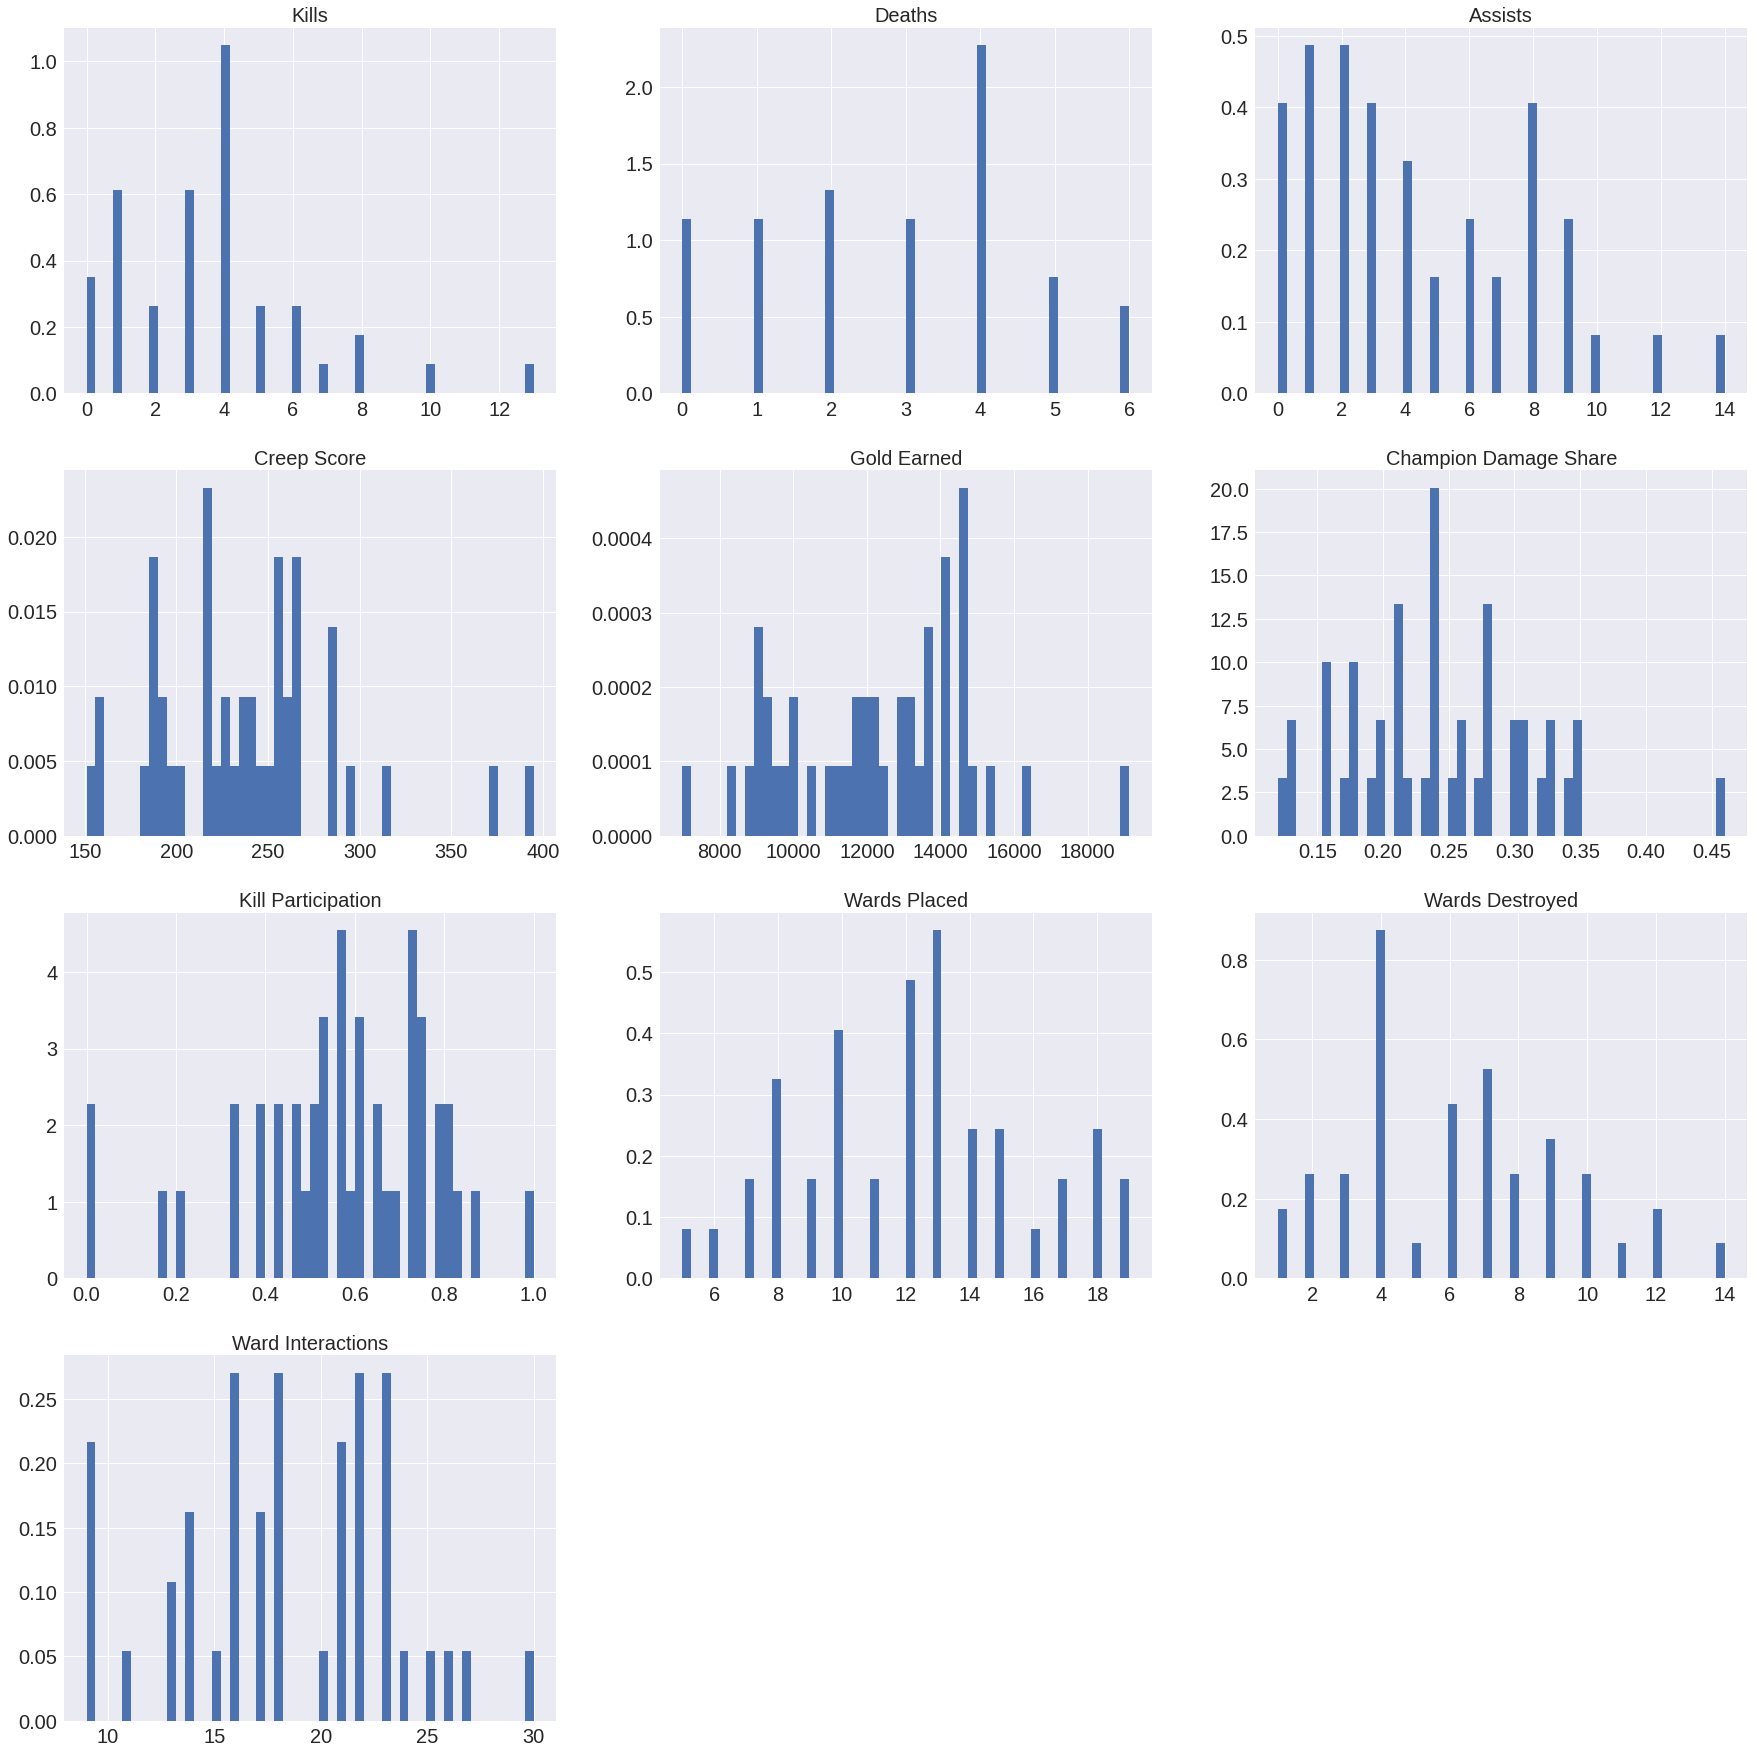

In [7]:
#Top
role = "Top"
fig,axes = plt.subplots(nrows= int(np.ceil(len(numeric_features)/3)), ncols= 3,figsize=(25,25))
axes = axes.flatten()
axes_to_remove = axes[- (len(axes)-len(numeric_features)):]
axes[ :- (len(axes)-len(numeric_features))]

for x in axes_to_remove:
    fig.delaxes(x)
print("Role {} :".format(role))  
for clm,ax in zip(numeric_features,axes):
    df = dataset_roles[role][clm]
    ax.hist(df,bins=50,density=1)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_title(clm,fontsize=20)

    print("\t{} Mean: {:.2f}".format(clm,df.mean()))
    print("\t{} Max: {}".format(clm,df.max()))
    print("\t{} Min: {}".format(clm,df.min()))
    print("\n")
    
fig.tight_layout(pad=3.0)

Role Jungle :
	Kills Mean: 2.86
	Kills Max: 8
	Kills Min: 0


	Deaths Mean: 3.18
	Deaths Max: 7
	Deaths Min: 0


	Assists Mean: 5.68
	Assists Max: 12
	Assists Min: 1


	Creep Score Mean: 182.73
	Creep Score Max: 267
	Creep Score Min: 116


	Gold Earned Mean: 10490.82
	Gold Earned Max: 14521
	Gold Earned Min: 6557


	Champion Damage Share Mean: 0.18
	Champion Damage Share Max: 0.37
	Champion Damage Share Min: 0.08


	Kill Participation Mean: 0.62
	Kill Participation Max: 1.0
	Kill Participation Min: 0.22


	Wards Placed Mean: 11.16
	Wards Placed Max: 22
	Wards Placed Min: 3


	Wards Destroyed Mean: 10.82
	Wards Destroyed Max: 30
	Wards Destroyed Min: 2


	Ward Interactions Mean: 21.98
	Ward Interactions Max: 43
	Ward Interactions Min: 7




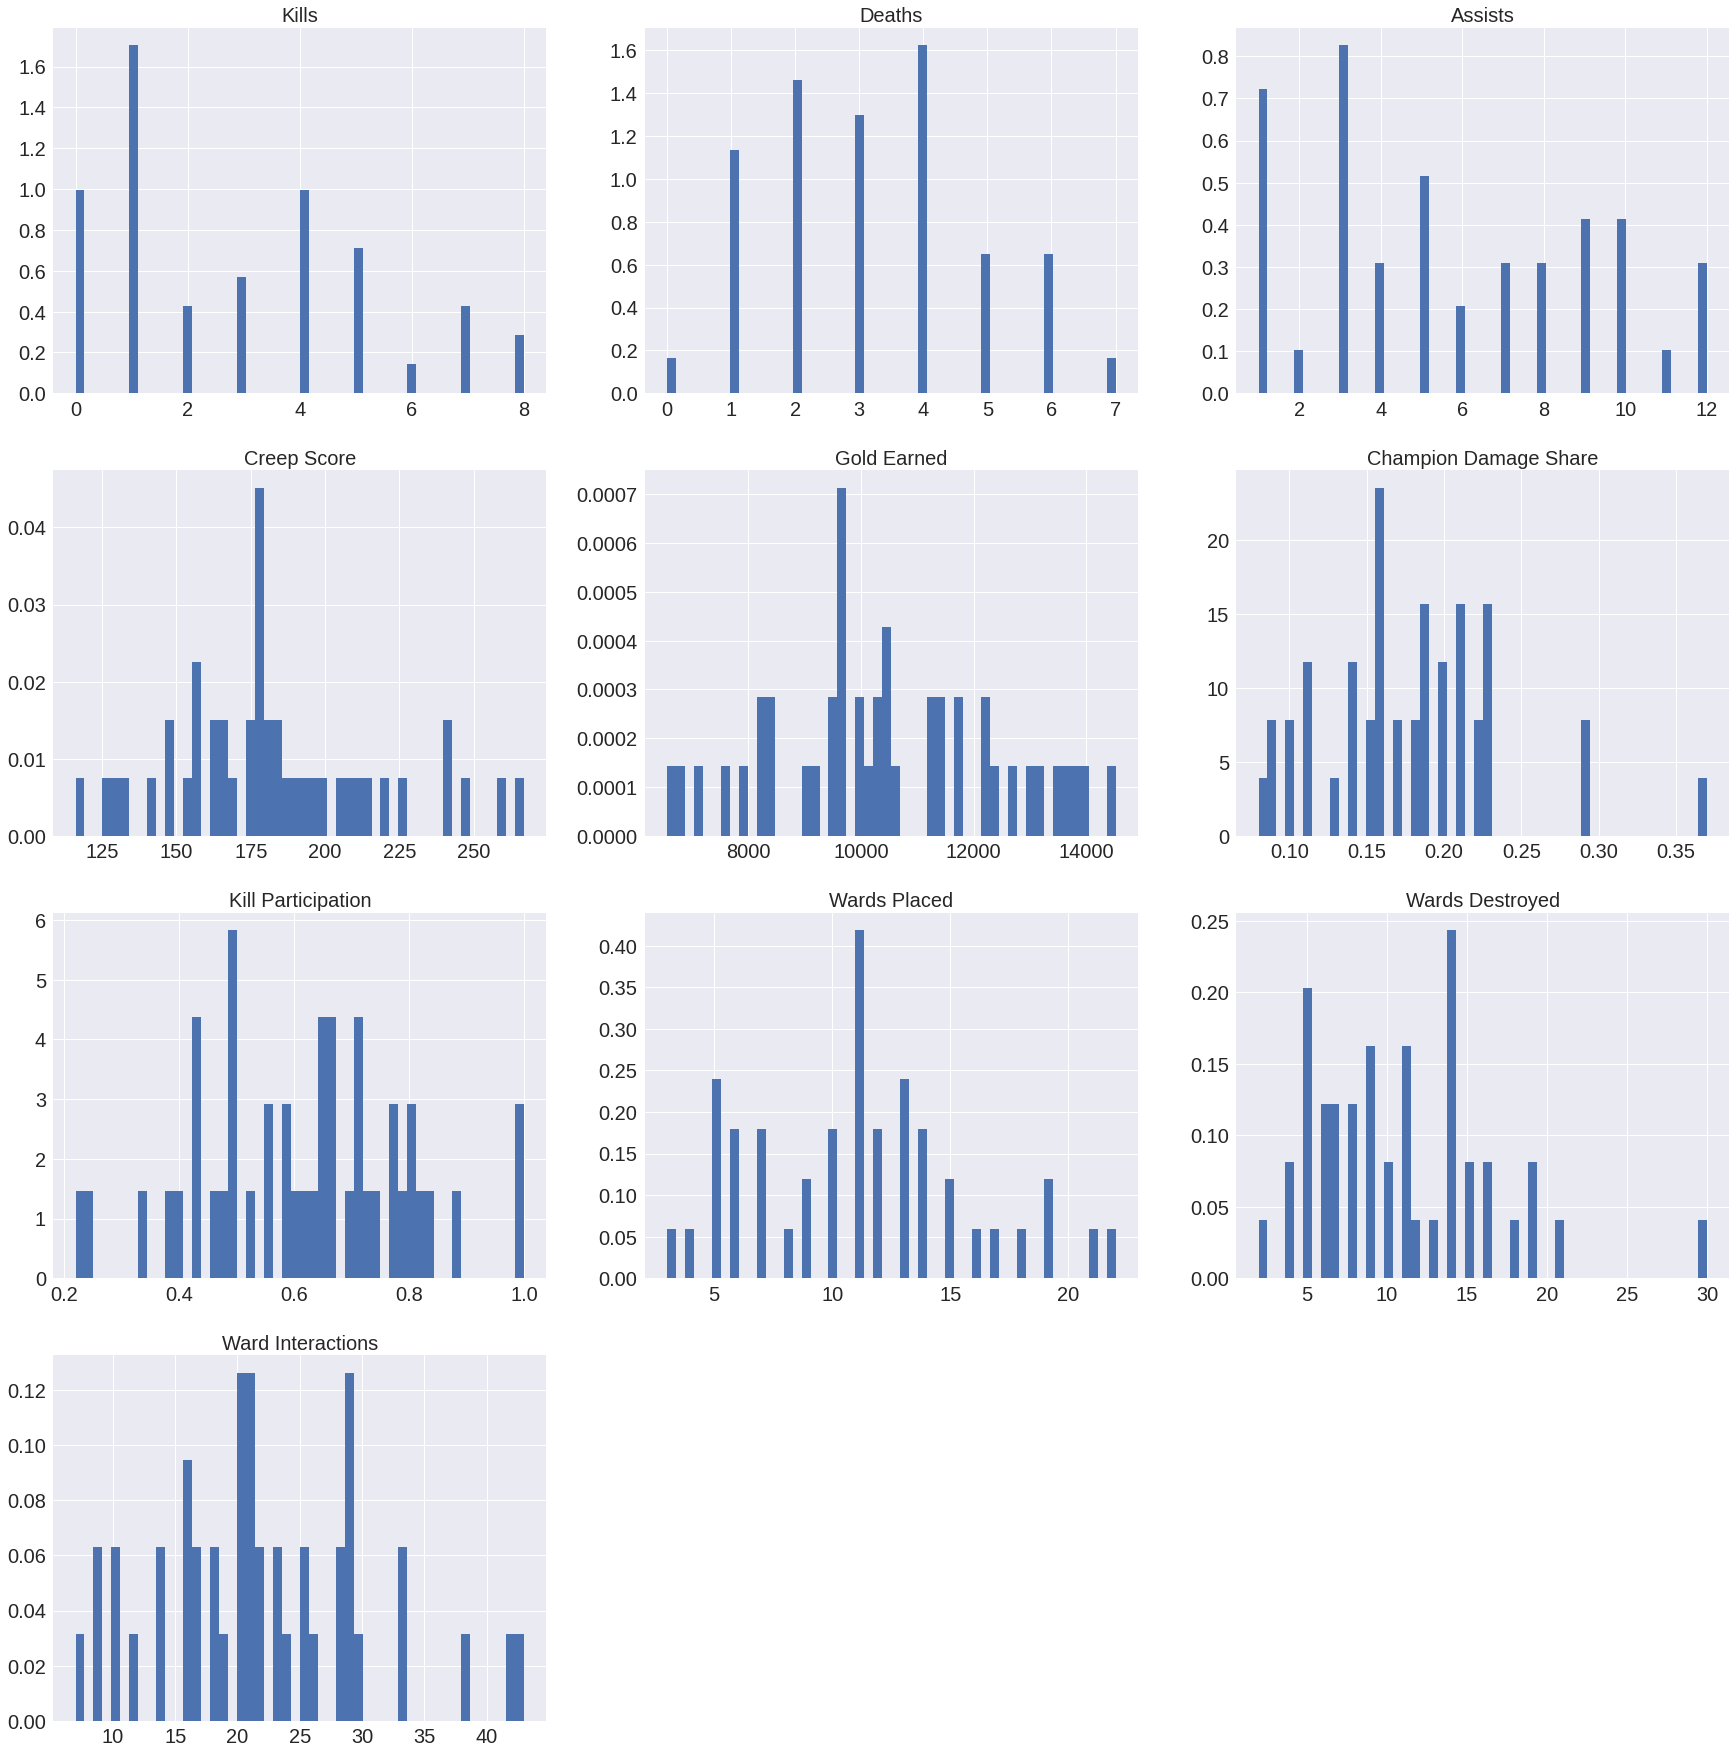

In [8]:
#Top
role = "Jungle"
fig,axes = plt.subplots(nrows= int(np.ceil(len(numeric_features)/3)), ncols= 3,figsize=(25,25))
axes = axes.flatten()
axes_to_remove = axes[- (len(axes)-len(numeric_features)):]
axes[ :- (len(axes)-len(numeric_features))]

for x in axes_to_remove:
    fig.delaxes(x)
print("Role {} :".format(role))  
for clm,ax in zip(numeric_features,axes):
    df = dataset_roles[role][clm]
    ax.hist(df,bins=50,density=1)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_title(clm,fontsize=20)

    print("\t{} Mean: {:.2f}".format(clm,df.mean()))
    print("\t{} Max: {}".format(clm,df.max()))
    print("\t{} Min: {}".format(clm,df.min()))
    print("\n")
    
fig.tight_layout(pad=3.0)

Role Support :
	Kills Mean: 0.61
	Kills Max: 3
	Kills Min: 0


	Deaths Mean: 2.84
	Deaths Max: 7
	Deaths Min: 0


	Assists Mean: 8.25
	Assists Max: 19
	Assists Min: 0


	Creep Score Mean: 41.20
	Creep Score Max: 200
	Creep Score Min: 14


	Gold Earned Mean: 7218.00
	Gold Earned Max: 10354
	Gold Earned Min: 4714


	Champion Damage Share Mean: 0.07
	Champion Damage Share Max: 0.12
	Champion Damage Share Min: 0.04


	Kill Participation Mean: 0.66
	Kill Participation Max: 1.0
	Kill Participation Min: 0.29


	Wards Placed Mean: 46.75
	Wards Placed Max: 92
	Wards Placed Min: 11


	Wards Destroyed Mean: 10.98
	Wards Destroyed Max: 21
	Wards Destroyed Min: 2


	Ward Interactions Mean: 57.73
	Ward Interactions Max: 112
	Ward Interactions Min: 18




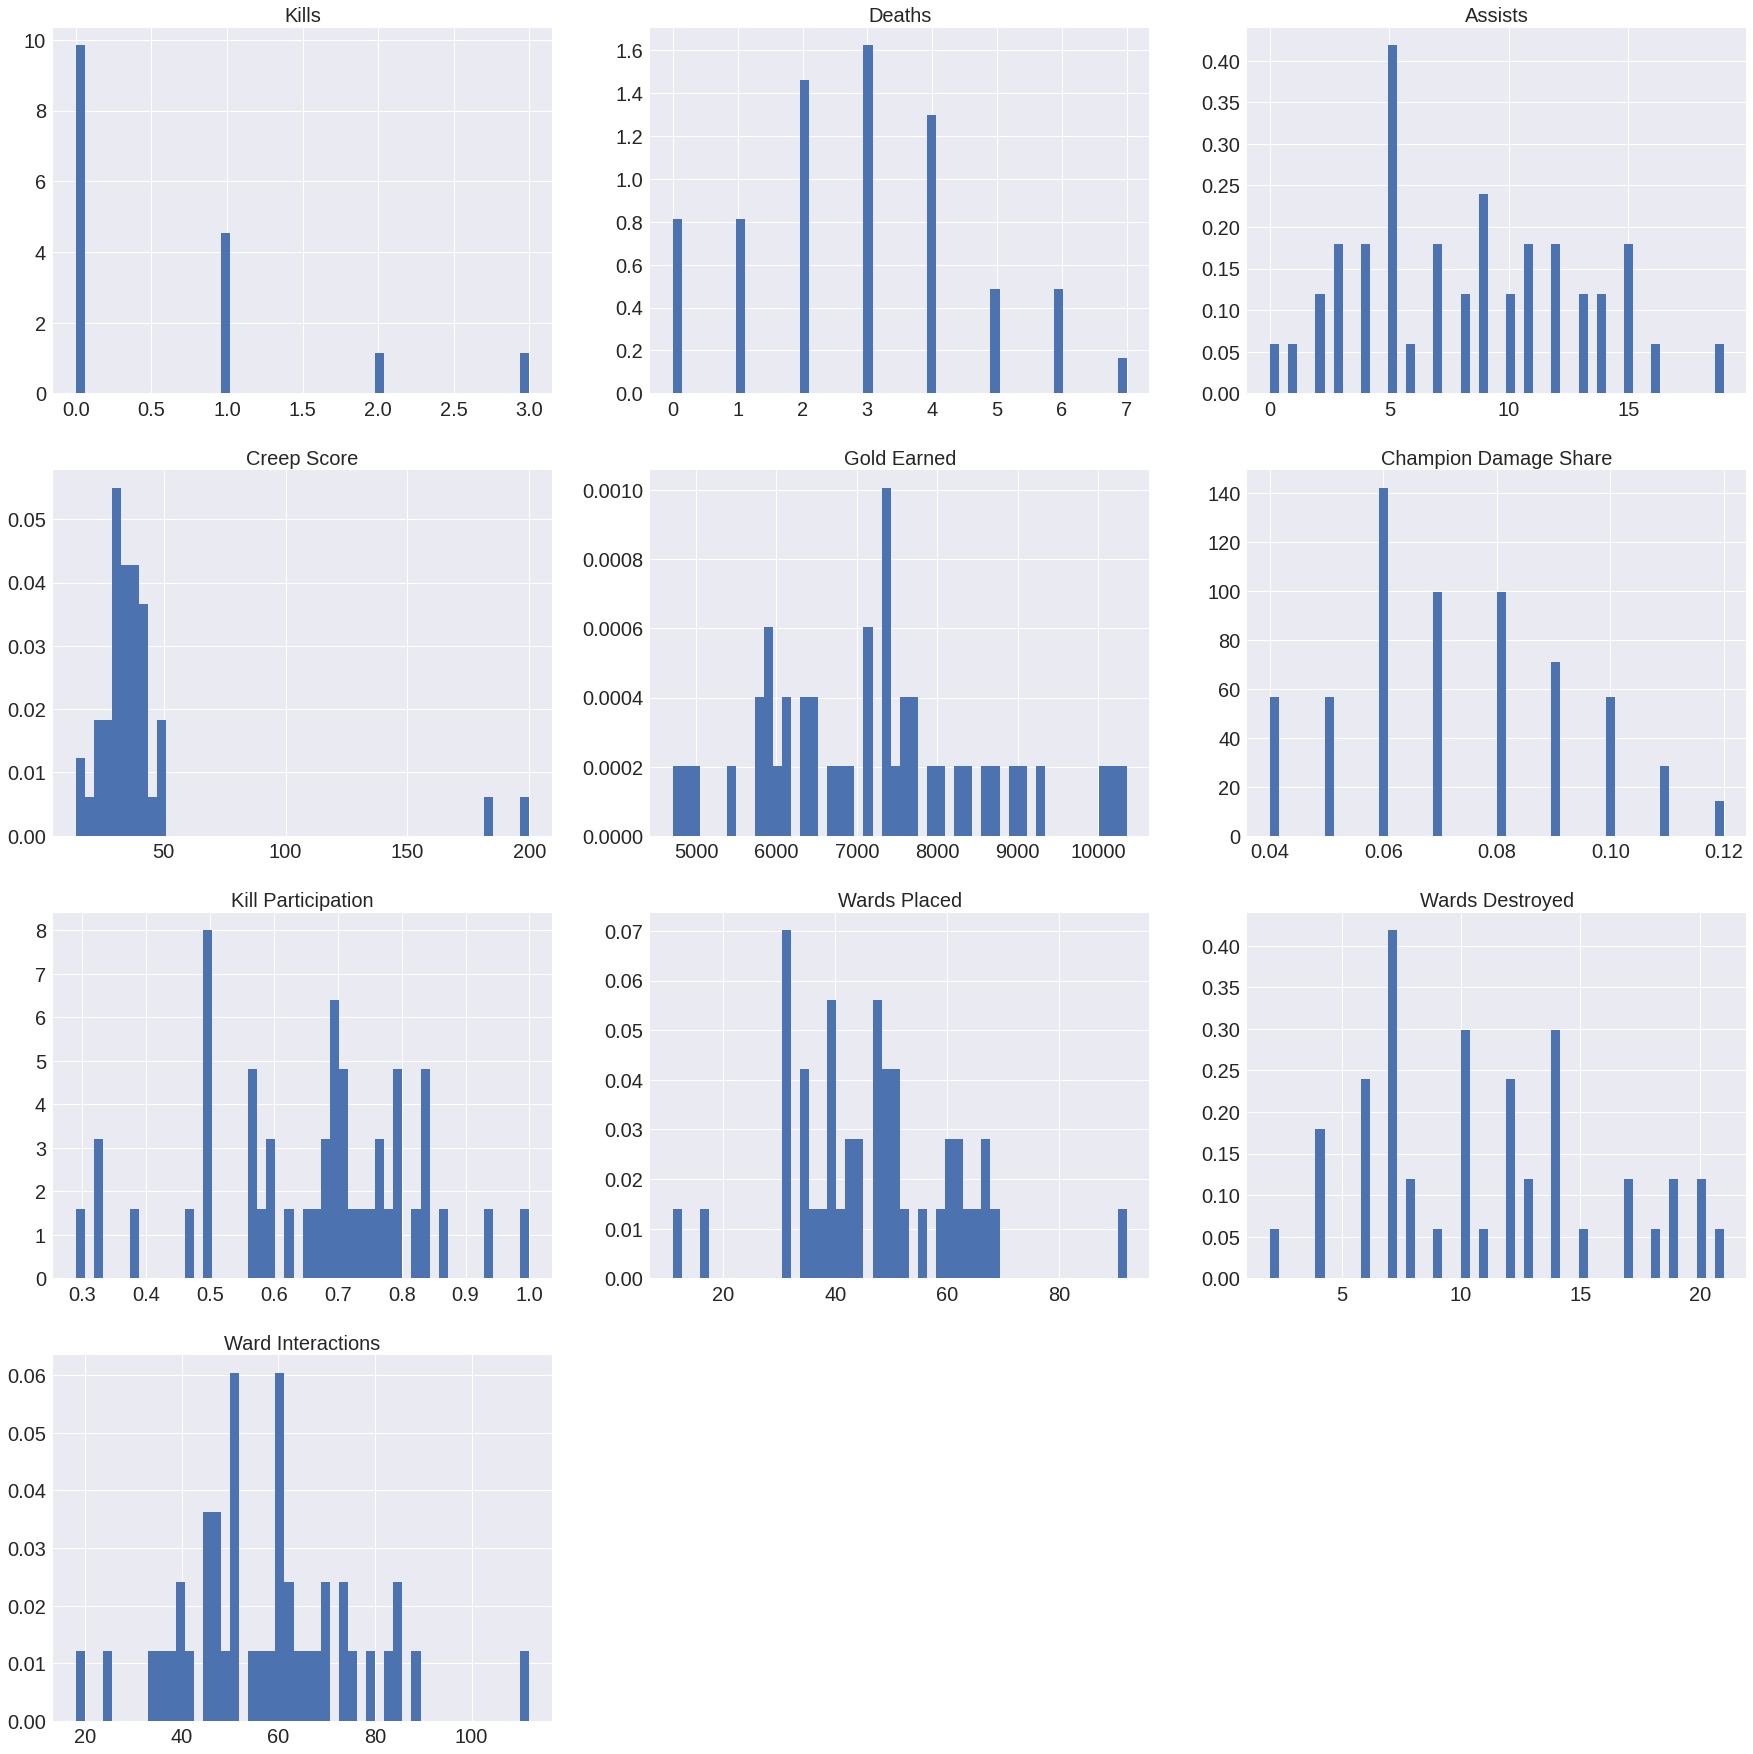

In [9]:
#Top
role = "Support"
fig,axes = plt.subplots(nrows= int(np.ceil(len(numeric_features)/3)), ncols= 3,figsize=(25,25))
axes = axes.flatten()
axes_to_remove = axes[- (len(axes)-len(numeric_features)):]
axes[ :- (len(axes)-len(numeric_features))]

for x in axes_to_remove:
    fig.delaxes(x)
print("Role {} :".format(role))  
for clm,ax in zip(numeric_features,axes):
    df = dataset_roles[role][clm]
    ax.hist(df,bins=50,density=1)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_title(clm,fontsize=20)

    print("\t{} Mean: {:.2f}".format(clm,df.mean()))
    print("\t{} Max: {}".format(clm,df.max()))
    print("\t{} Min: {}".format(clm,df.min()))
    print("\n")
    
fig.tight_layout(pad=3.0)

Role Adc :
	Kills Mean: 3.86
	Kills Max: 10
	Kills Min: 0


	Deaths Mean: 2.16
	Deaths Max: 5
	Deaths Min: 0


	Assists Mean: 4.89
	Assists Max: 16
	Assists Min: 1


	Creep Score Mean: 279.73
	Creep Score Max: 419
	Creep Score Min: 50


	Gold Earned Mean: 13058.41
	Gold Earned Max: 20546
	Gold Earned Min: 7485


	Champion Damage Share Mean: 0.27
	Champion Damage Share Max: 0.47
	Champion Damage Share Min: 0.13


	Kill Participation Mean: 0.63
	Kill Participation Max: 0.95
	Kill Participation Min: 0.27


	Wards Placed Mean: 14.05
	Wards Placed Max: 35
	Wards Placed Min: 7


	Wards Destroyed Mean: 9.32
	Wards Destroyed Max: 22
	Wards Destroyed Min: 2


	Ward Interactions Mean: 23.36
	Ward Interactions Max: 51
	Ward Interactions Min: 9




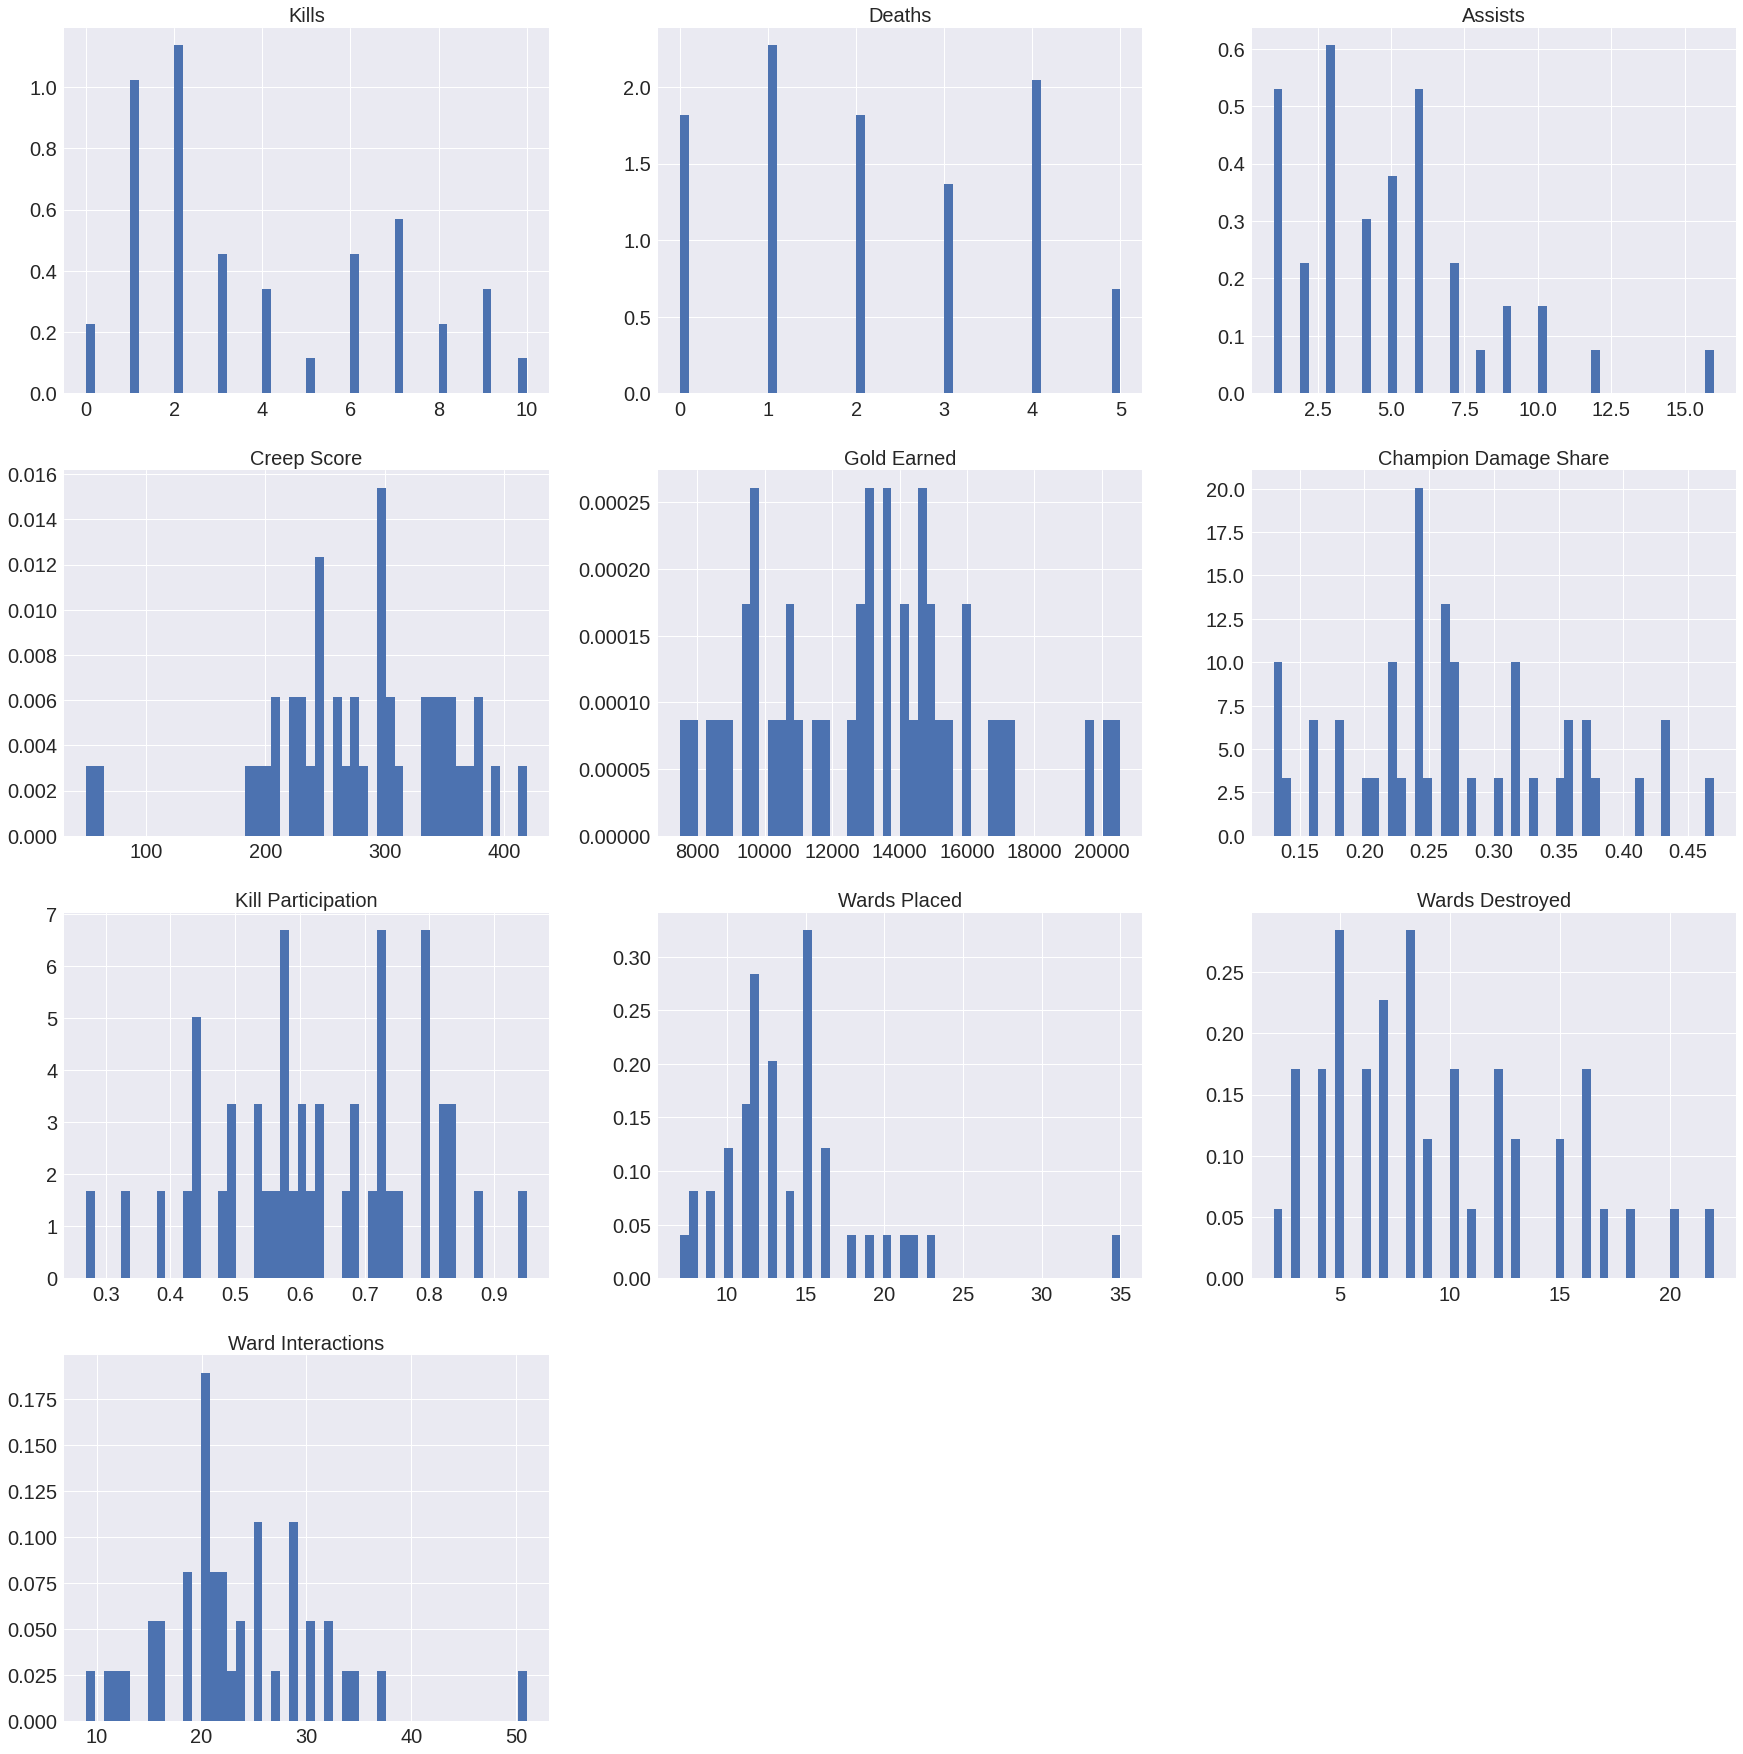

In [10]:
#Top
role = "Adc"
fig,axes = plt.subplots(nrows= int(np.ceil(len(numeric_features)/3)), ncols= 3,figsize=(25,25))
axes = axes.flatten()
axes_to_remove = axes[- (len(axes)-len(numeric_features)):]
axes[ :- (len(axes)-len(numeric_features))]

for x in axes_to_remove:
    fig.delaxes(x)
print("Role {} :".format(role))  
for clm,ax in zip(numeric_features,axes):
    df = dataset_roles[role][clm]
    ax.hist(df,bins=50,density=1)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_title(clm,fontsize=20)

    print("\t{} Mean: {:.2f}".format(clm,df.mean()))
    print("\t{} Max: {}".format(clm,df.max()))
    print("\t{} Min: {}".format(clm,df.min()))
    print("\n")
    
fig.tight_layout(pad=3.0)

Role Mid :
	Kills Mean: 2.55
	Kills Max: 8
	Kills Min: 0


	Deaths Mean: 2.59
	Deaths Max: 6
	Deaths Min: 0


	Assists Mean: 5.11
	Assists Max: 13
	Assists Min: 0


	Creep Score Mean: 260.00
	Creep Score Max: 414
	Creep Score Min: 162


	Gold Earned Mean: 12024.59
	Gold Earned Max: 18076
	Gold Earned Min: 7300


	Champion Damage Share Mean: 0.24
	Champion Damage Share Max: 0.41
	Champion Damage Share Min: 0.12


	Kill Participation Mean: 0.57
	Kill Participation Max: 1.0
	Kill Participation Min: 0.0


	Wards Placed Mean: 13.07
	Wards Placed Max: 24
	Wards Placed Min: 3


	Wards Destroyed Mean: 6.20
	Wards Destroyed Max: 23
	Wards Destroyed Min: 1


	Ward Interactions Mean: 19.27
	Ward Interactions Max: 37
	Ward Interactions Min: 9




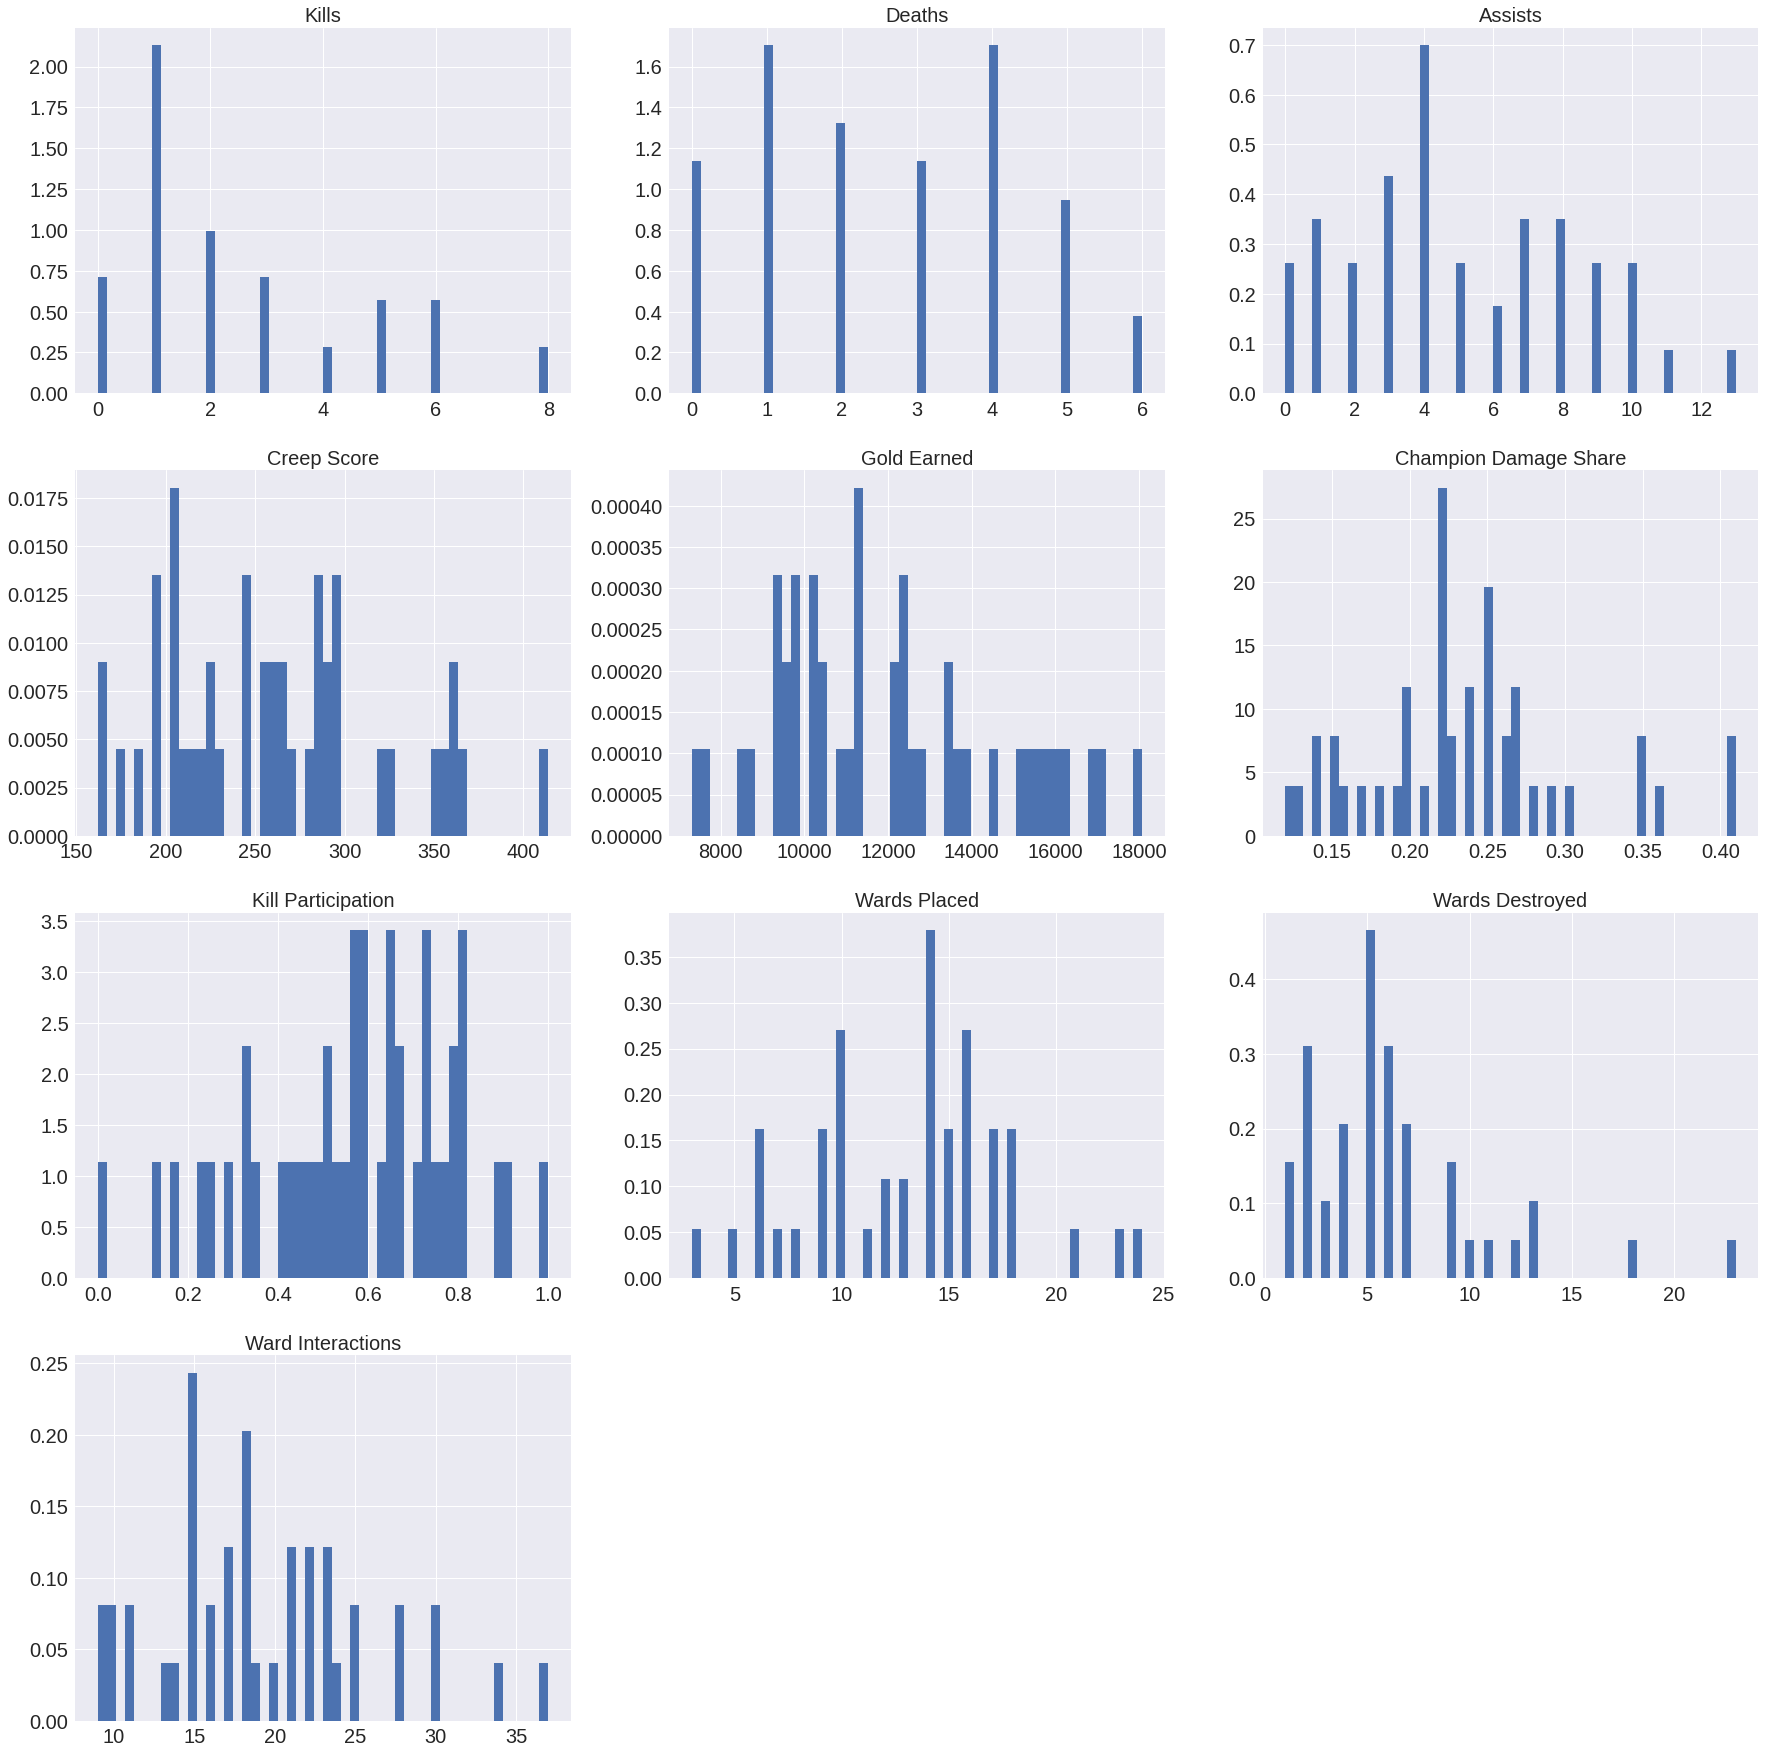

In [11]:
#Top
role = "Mid"
fig,axes = plt.subplots(nrows= int(np.ceil(len(numeric_features)/3)), ncols= 3,figsize=(25,25))
axes = axes.flatten()
axes_to_remove = axes[- (len(axes)-len(numeric_features)):]
axes[ :- (len(axes)-len(numeric_features))]

for x in axes_to_remove:
    fig.delaxes(x)
print("Role {} :".format(role))  
for clm,ax in zip(numeric_features,axes):
    df = dataset_roles[role][clm]
    ax.hist(df,bins=50,density=1)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_title(clm,fontsize=20)

    print("\t{} Mean: {:.2f}".format(clm,df.mean()))
    print("\t{} Max: {}".format(clm,df.max()))
    print("\t{} Min: {}".format(clm,df.min()))
    print("\n")
    
fig.tight_layout(pad=3.0)

In [12]:
df = dataset.groupby("Position")

for clm in numeric_features:
    role_max = df[clm].mean().idxmax()
    print("The Max Mean for the feature {1} is for the role {0} and is {2}".format(role_max,clm,df[clm].mean().max()))

The Max Mean for the feature Kills is for the role Adc and is 3.8636363636363638
The Max Mean for the feature Deaths is for the role Jungle and is 3.1818181818181817
The Max Mean for the feature Assists is for the role Support and is 8.25
The Max Mean for the feature Creep Score is for the role Adc and is 279.72727272727275
The Max Mean for the feature Gold Earned is for the role Adc and is 13058.40909090909
The Max Mean for the feature Champion Damage Share is for the role Adc and is 0.26931818181818185
The Max Mean for the feature Kill Participation is for the role Support and is 0.6593181818181818
The Max Mean for the feature Wards Placed is for the role Support and is 46.75
The Max Mean for the feature Wards Destroyed is for the role Support and is 10.977272727272727
The Max Mean for the feature Ward Interactions is for the role Support and is 57.72727272727273


This statistic is comparable with the knowlegde of someone that know how the game works because as we can see the role Support has the best stats in everything that is a mean to  support the teams and the for other one can be said the same thing

Let's check if some numeric features are corellated with each other

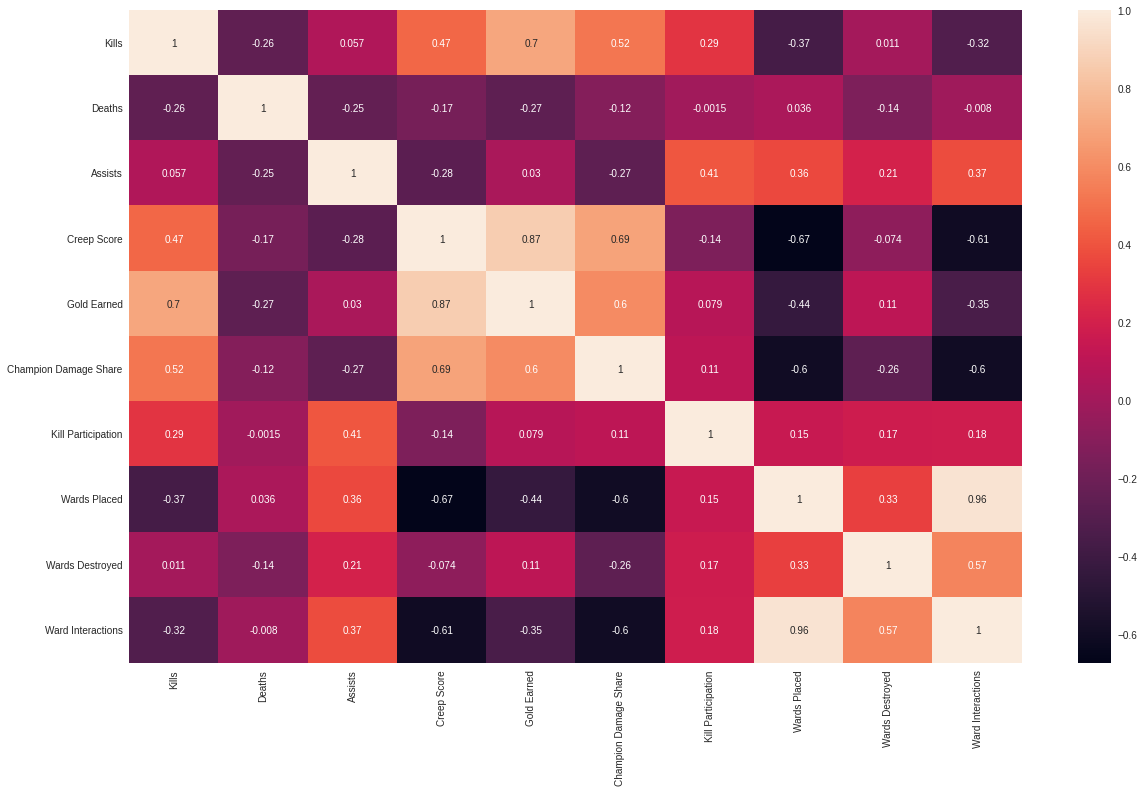

In [20]:
corr_matrix =dataset[numeric_features].corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix,annot=True)

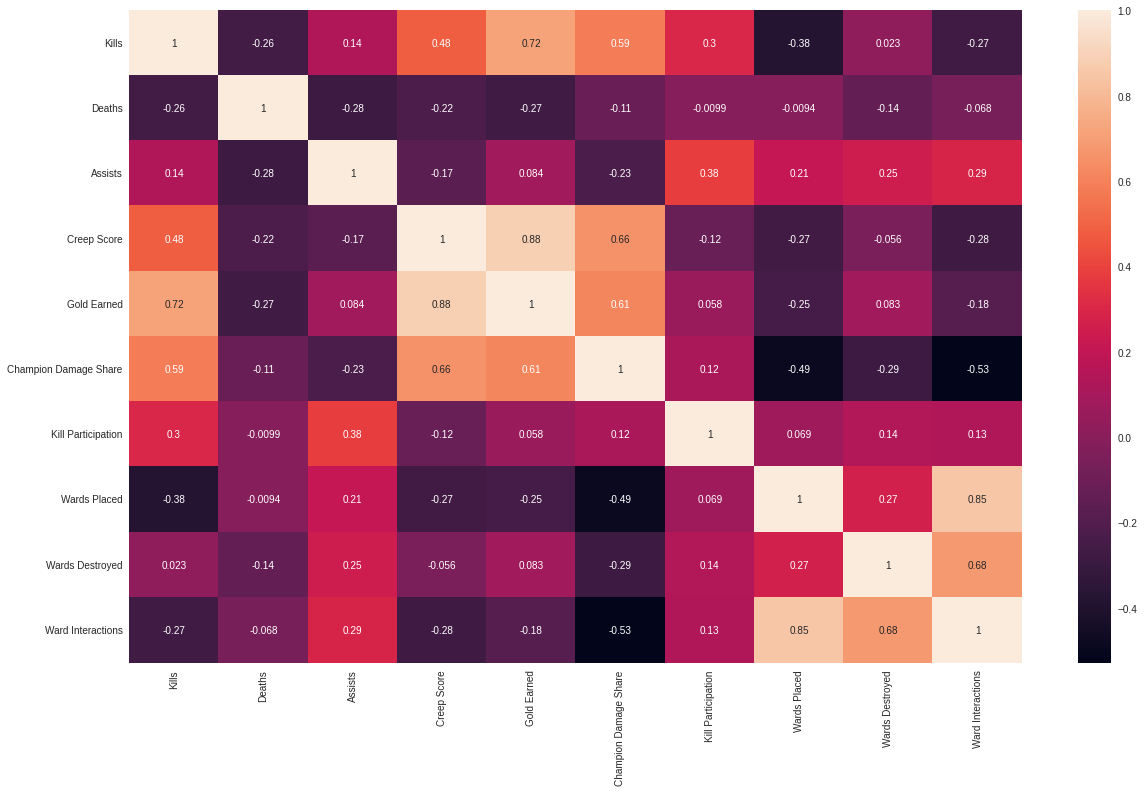

In [21]:
corr_matrix =dataset[numeric_features].corr(method="spearman")
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix,annot=True)

It seems that there are a lot of interaction beetween the values in different groups : 
> {CreepScore,GoldEarned,ChampionDmgShare,Kills}

> {WardPlaced,WardDestroyed,WardInteractions}

> {WardPlaced,WardDestroyed,ChampionDmgShare,CreepScore}

Let's Plot this correlation 

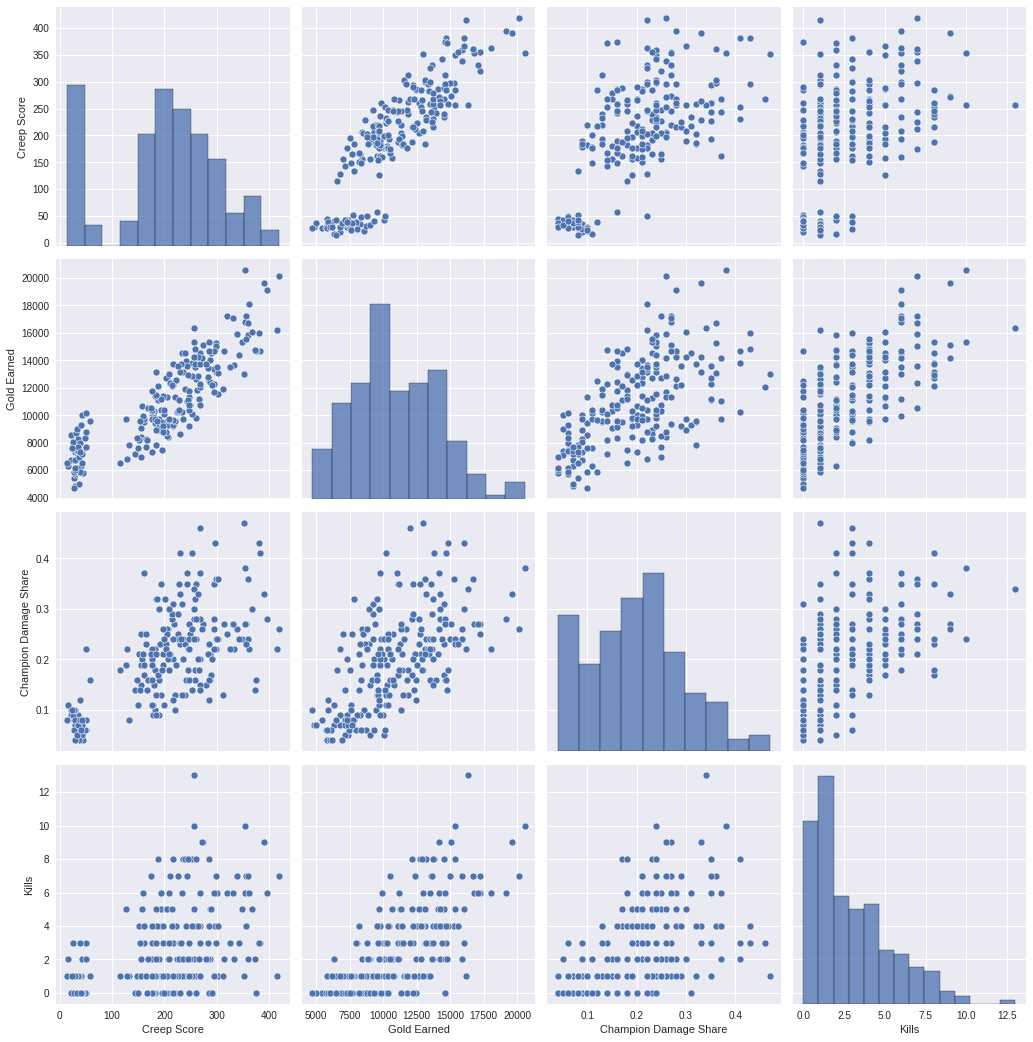

In [24]:
first_group = ["Creep Score" ,"Gold Earned","Champion Damage Share","Kills"]
f = sns.pairplot(dataset[first_group])
f.fig.set_size_inches(15,15)

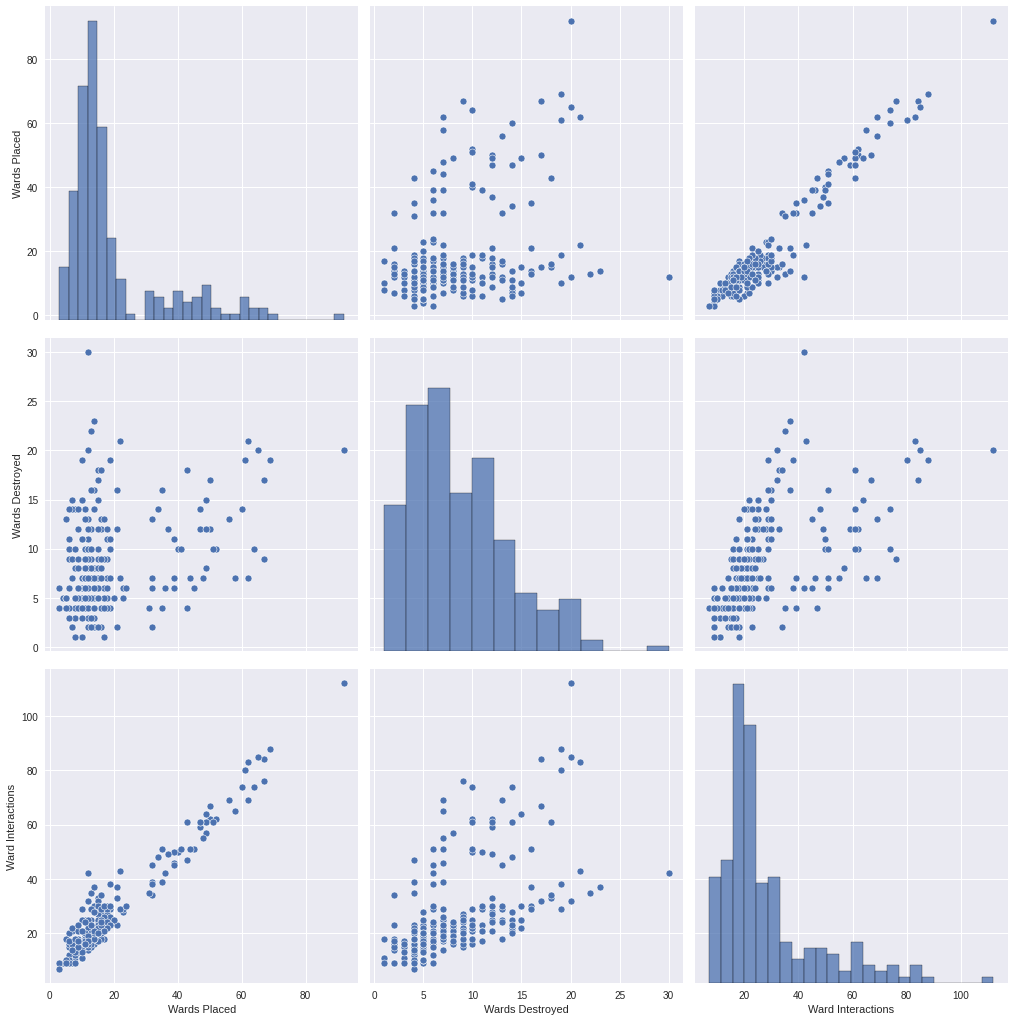

In [22]:
second_group =  ["Wards Placed","Wards Destroyed","Ward Interactions"]
f = sns.pairplot(dataset[second_group])
f.fig.set_size_inches(15,15)

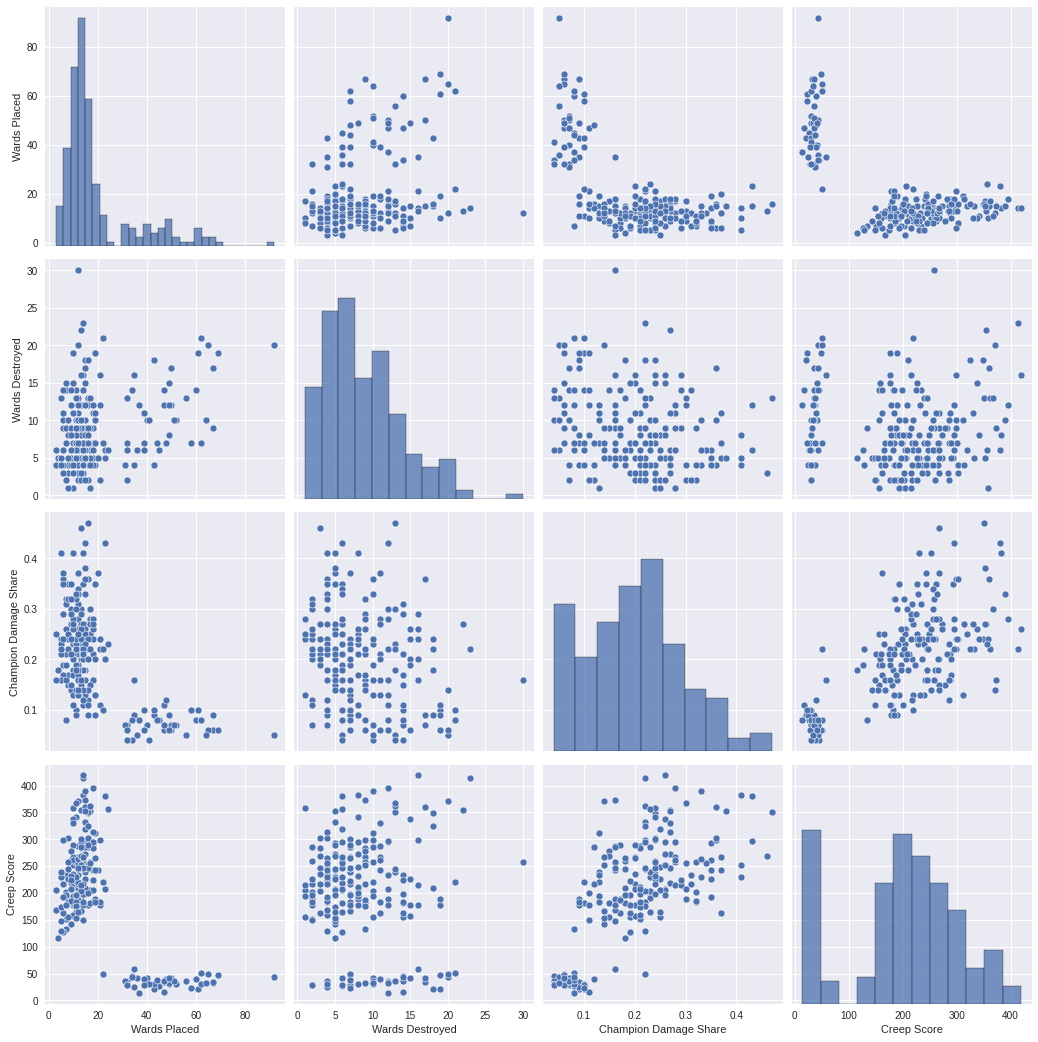

In [23]:
third_group =  ["Wards Placed","Wards Destroyed","Champion Damage Share","Creep Score"]
f = sns.pairplot(dataset[third_group])
f.fig.set_size_inches(15,15)

There is a strong linear correlation with ward placed and interaction, so the most interation point is earned with placed wards, as the other correlation the one that is possible to see something visually is with the ward placed and the other features probably because going over some value(around 15) the point are probably Support so they will have low creeps score and damage share so its possible to visually divide the dataset in 2 part.

Let's visualize some stats of the entire teams

In [32]:
teams_game = dataset.groupby("Team")

for clm in (numeric_features + rank_features):
    best_team_mean = teams_game[clm].mean().idxmax()
    print("The Best Team for {} is {} with a mean of : {:.2f} ".format(clm , best_team_mean, teams_game[clm].mean().max()))


The Best Team for Kills is LNG with a mean of : 3.45 
The Best Team for Deaths is UOL with a mean of : 3.64 
The Best Team for Assists is C9 with a mean of : 7.48 
The Best Team for Creep Score is HLE with a mean of : 230.25 
The Best Team for Gold Earned is HLE with a mean of : 12268.75 
The Best Team for Champion Damage Share is INF with a mean of : 0.20 
The Best Team for Kill Participation is C9 with a mean of : 0.66 
The Best Team for Wards Placed is HLE with a mean of : 22.45 
The Best Team for Wards Destroyed is HLE with a mean of : 11.70 
The Best Team for Ward Interactions is HLE with a mean of : 34.15 
The Best Team for Dragons For is HLE with a mean of : 3.25 
The Best Team for Dragons Against is UOL with a mean of : 2.80 
The Best Team for Barons For is DFM with a mean of : 1.20 
The Best Team for Barons Against is BYG with a mean of : 1.00 


Let's write the code to analyze player by player all the stats

In [65]:
player_dataset = dataset.groupby(["Player","Position"]).sum()
print("Number of player in total: {}".format(player_dataset.shape[0]))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(player_dataset)


Number of player in total: 55
                     Kills  Deaths  Assists  Creep Score  Gold Earned  \
Player     Position                                                     
Ackerman   Support       0      10       22          135        25310   
Aegis      Jungle        6      14       16          785        39684   
Ahahacik   Jungle        8      17       26          815        47441   
Aladoric   Support       0      10       43          154        26385   
Ale        Top          26       3       16         1110        60278   
Alive      Adc          16      13       14         1099        49848   
Argonavt   Adc           7      17       33          778        48555   
Aria       Mid          13       4       23         1372        65318   
Babip      Jungle       11      12       22          524        31576   
Bapip      Jungle        4       5        1          162         9729   
Blaber     Jungle       19      16       36         1008        57734   
Bolulu     Mid       

In [107]:

best_player_each_categories = zip(player_dataset.idxmax().index,player_dataset.max(),player_dataset.idxmax())
mean_each_categories = player_dataset.mean()
i=0
for index ,value ,player in best_player_each_categories:
    print("The player {} as {} is the best in the categories {} with {:.2f} {}".format(player[0], player [1] ,index, value ,index))
    print("{} was {:.2f}% better then the average of {:.2f}".format(player[0], (value/mean_each_categories[i]  - 1)  * 100,mean_each_categories[i]))
    print("")
    i+=1

The player Doggo as Adc is the best in the categories Kills with 29.00 Kills
Doggo was 167.62% better then the average of 10.84

The player Kino as Support is the best in the categories Deaths with 22.00 Deaths
Kino was 102.34% better then the average of 10.87

The player Gaeng as Support is the best in the categories Assists with 54.00 Assists
Gaeng was 138.17% better then the average of 22.67

The player Doggo as Adc is the best in the categories Creep Score with 1707.00 Creep Score
Doggo was 113.01% better then the average of 801.36

The player Doggo as Adc is the best in the categories Gold Earned with 77662.00 Gold Earned
Doggo was 76.37% better then the average of 44032.64

The player Doggo as Adc is the best in the categories Champion Damage Share with 1.97 Champion Damage Share
Doggo was 146.25% better then the average of 0.80

The player Boss as Top is the best in the categories Kill Participation with 3.95 Kill Participation
Boss was 62.34% better then the average of 2.43

Th